# Calgary Traffic Analysis

In [1]:
import csv
import re
import folium
from folium.features import DivIcon
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import city_boundary as cb
import speed_limit as sl

In [2]:
# parsing City_Boundary_layer.csv to retrieve a list of boundary coordinates
boundary_coordinates = cb.get_boundary_coordinates('City_Boundary_layer.csv')
coordinate_list = cb.get_coordinate_list(boundary_coordinates)

In [3]:
# finding the north, south, east, and west most coordinates from boundary coordinate list
north = max(coordinate_list[0])
south = min(coordinate_list[0])
east = max(coordinate_list[1])
west = min(coordinate_list[1])

# assigning the four boundary corner coordinates
nw = [north, west]
ne = [north, east]
se = [south, east]
sw = [south, west]

# dataframe containing coordinate locations of the four boundary corners
boundary_corners_df = pd.DataFrame([nw,ne,se,sw],\
                                   index=['NW','NE','SE','SW'],\
                                   columns=['Latitude','Longitude'])

boundary_corners_df

,Latitude,Longitude
NW,51.212425,-114.315796
NE,51.212425,-113.859905
SE,50.842822,-113.859905
SW,50.842822,-114.315796


In [4]:
m = folium.Map(location=[51.0447, -114.0719], zoom_start=10)

# boundary lines
cb.draw_boundary_lines(nw,ne,sw,se,m)

m

In [5]:
# gathering points to plot ployline grid
top_points = cb.get_plot_points(ne,nw)
right_points = cb.get_plot_points(se,ne)
bottom_points = cb.get_plot_points(se,sw)
left_points = cb.get_plot_points(sw,nw)

# drawing grid on folium map
cb.draw_grid_lines(top_points, bottom_points, left_points, right_points, m)

m

In [6]:
# computing cell boundaries and assigning cell locations
cells = cb.get_cell_boundaries(top_points, left_points)
cb.draw_cell_number(cells, m)

m

In [7]:
# dataframe containing cell boundaries
cells_df = pd.DataFrame(cells,\
                        index=np.arange(1, len(cells)+1),\
                        columns=['North Boundary','East Boundary','South Boundary','West Boundary'])

cells_df

,North Boundary,East Boundary,South Boundary,West Boundary
1,51.212425,-114.270207,51.175465,-114.315796
2,51.212425,-114.224618,51.175465,-114.270207
3,51.212425,-114.179029,51.175465,-114.224618
4,51.212425,-114.133440,51.175465,-114.179029
5,51.212425,-114.087851,51.175465,-114.133440
...,...,...,...,...
96,50.879782,-114.042261,50.842822,-114.087851
97,50.879782,-113.996672,50.842822,-114.042261
98,50.879782,-113.951083,50.842822,-113.996672
99,50.879782,-113.905494,50.842822,-113.951083


In [8]:
streets=sl.get_street('Speed_Limits.csv')

In [9]:
streets['Line'][0][3]
    

'-114.073763902379 50.915020896341, -114.073778875428 50.915070244323, -114.073795110735 50.915129106452, -114.073816943444 50.915194245408, -114.073837530373 50.915256637824, -114.07386311831 50.915340220843, -114.073879961606 50.91539044774, -114.073894312441 50.915435575323, -114.073921144745 50.915519942361, -114.073936743379 50.915568993254, -114.073959207286 50.915640018389, -114.073977921854 50.915695346771, -114.074002253038 50.915769903757, -114.074022847495 50.915835828273, -114.074038441983 50.915882131829, -114.07406652175 50.915970815901, -114.074085864724 50.916031245652, -114.074112071262 50.916112473749, -114.074125171672 50.916151713686, -114.074137899571 50.916192785107'

In [10]:
NS_bins=pd.interval_range(start=south,end=north,periods=10)
EW_bins=pd.interval_range(start=west,end=east,periods=10)

In [11]:
points=[]
for i in range(len(streets)):
    speed = streets['Speed'][i]
    pointlist=[]
    for line in streets['Line'][i]:
        for point in line.split(","):
            longitude=float(point.split()[0].strip())
            latitude=float(point.split()[1].strip())
            if [latitude,longitude] not in pointlist:
                pointlist.append([latitude,longitude])
    points.append([streets['Name'][i],speed,pointlist])

In [12]:
Sum_Count_Grid=[[0,0] for i in range(100)]
SW_interval=(east-west)/10
NS_interval=(north-south)/10

for name , speed , line in points:
    for latitude, longitude in line:
        tens=90-int((latitude-south)/NS_interval)*10
        ones=int((longitude-west)/SW_interval)
        i=tens+ones
        Sum_Count_Grid[i-1][0]+=speed
        Sum_Count_Grid[i-1][1]+=1


In [13]:
Average_Speed=[ 0 for i in range(100)]
for i in range(100):
    if Sum_Count_Grid[i][1]!=0:
        Average_Speed[i]=Sum_Count_Grid[i][0]/Sum_Count_Grid[i][1]

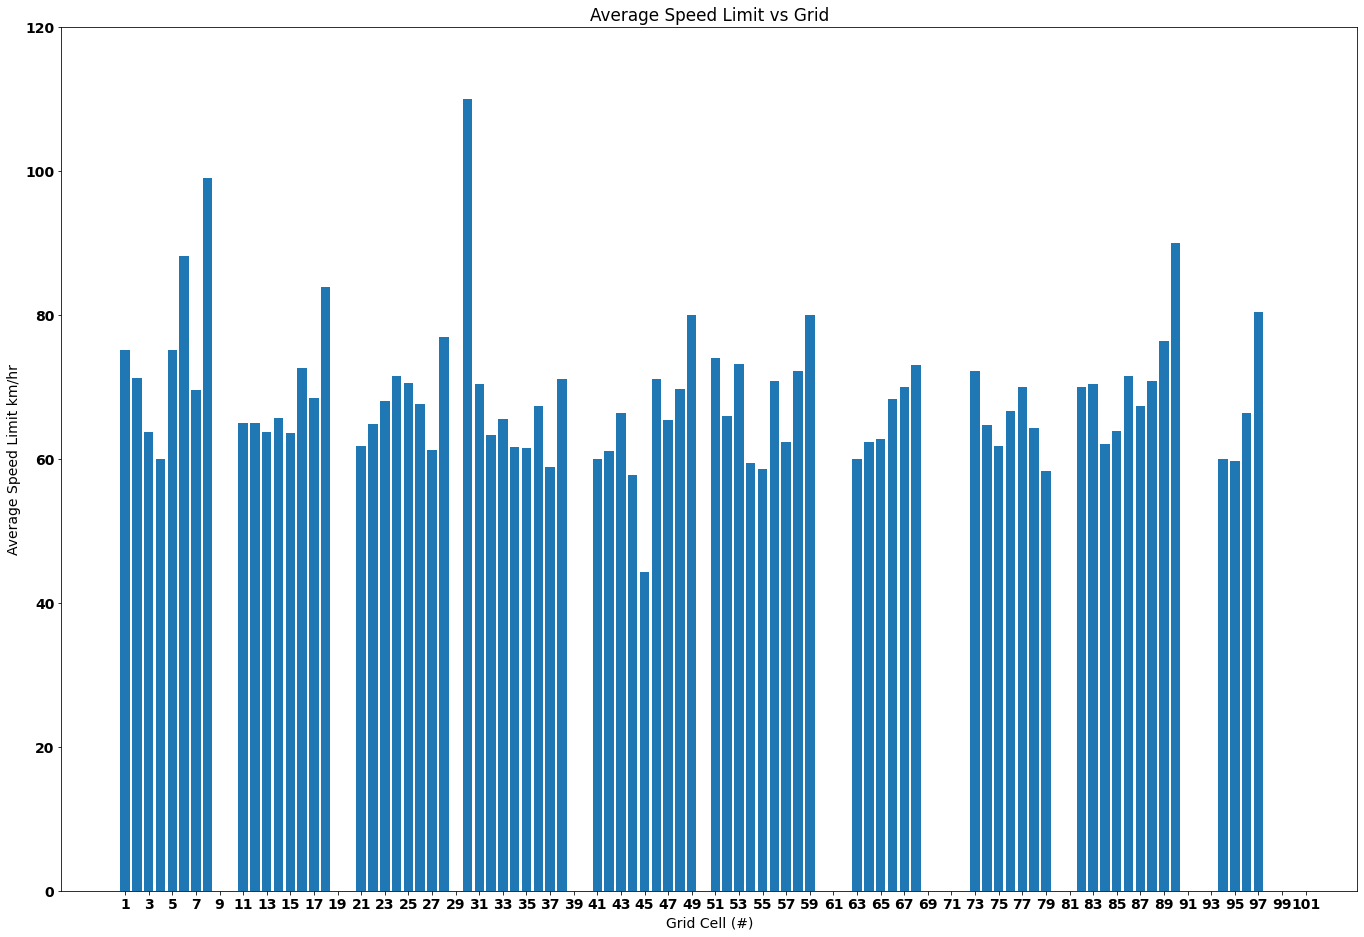

In [14]:
font = {'family' : 'DejaVu Sans','weight' : 'bold', 'size' : 14}
plt.rc('font',**font)
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.bar([i+1 for i in range(100)],Average_Speed)
title = 'Average Speed Limit vs Grid'
plt.title(title)
plt.xlabel('Grid Cell (#)')
plt.ylabel('Average Speed Limit km/hr')
plt.xticks(np.arange(1,102,2))
plt.ylim(0,120)
plt.show()

# Cameras

In [15]:
camerasdf = pd.read_csv('Traffic_Camera_Locations.csv')
camerasdf = pd.DataFrame(camerasdf)

lat = camerasdf['latitude'].tolist()
lon = camerasdf['longitude'].tolist()
coordinates = [list(a) for a in zip(lat,lon)]

Sum_Count_Grid=[[0,0] for i in range(100)]
SW_interval=(east-west)/10
NS_interval=(north-south)/10

Camera_Grid_Count=[0 for i in range(100)]

for latitude, longitude in coordinates:
    tens=90-int((latitude-south)/NS_interval)*10
    ones=int((longitude-west)/SW_interval)
    i=tens+ones
    Camera_Grid_Count[i]+=1


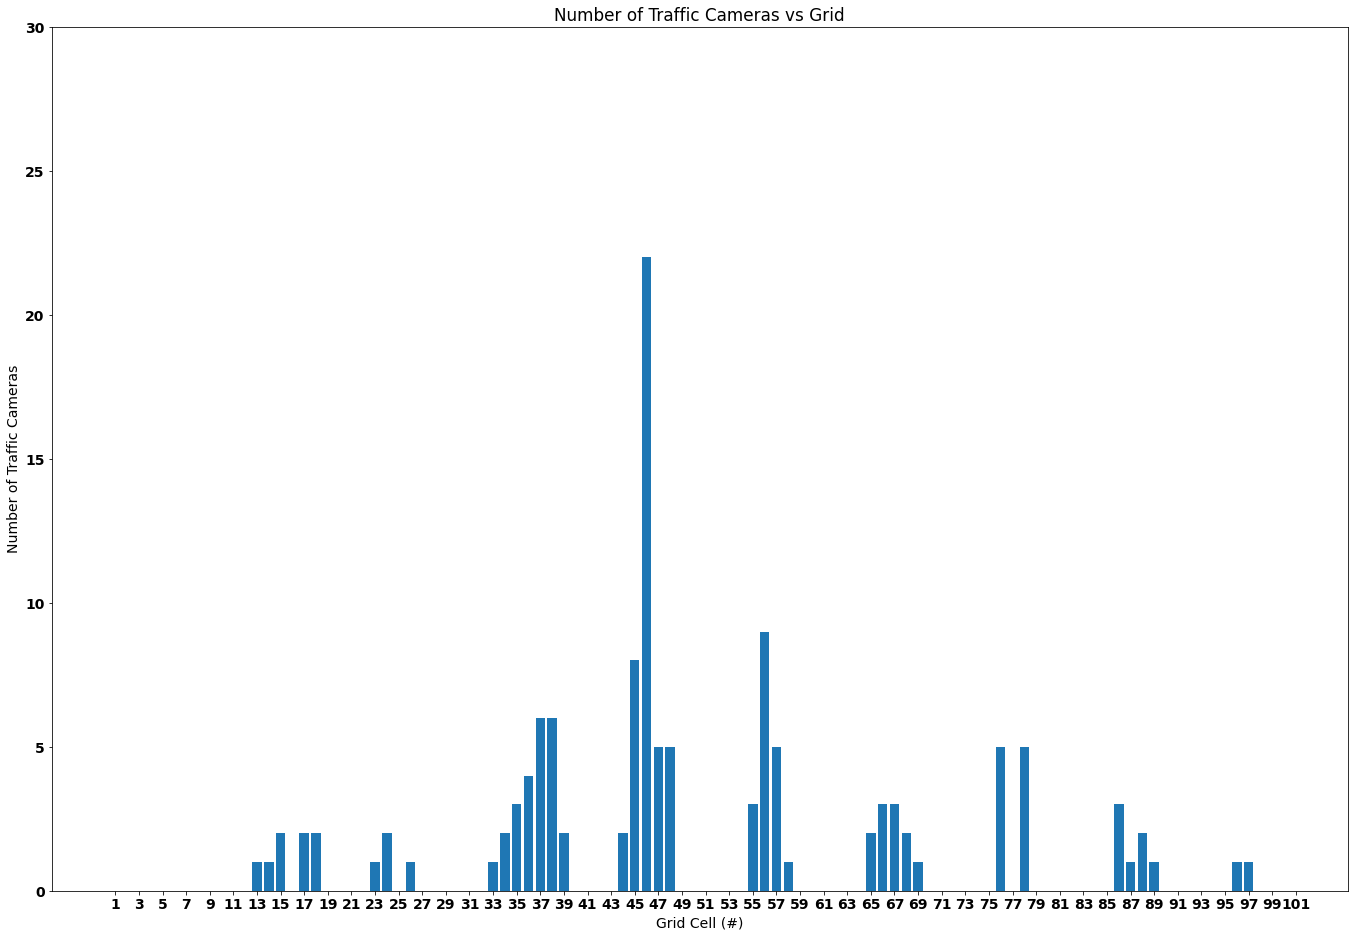

In [19]:

font = {'family' : 'DejaVu Sans','weight' : 'bold', 'size' : 14}
plt.rc('font',**font)
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.bar([i+1 for i in range(100)],Camera_Grid_Count)
title = 'Number of Traffic Cameras vs Grid'
plt.title(title)
plt.xlabel('Grid Cell (#)')
plt.ylabel('Number of Traffic Cameras')
plt.xticks(np.arange(1,102,2))
plt.ylim(0,30)
plt.show()